## Object Detection

In [20]:
from transformers.utils import logging
logging.set_verbosity_error()

c:\Users\kaan\anaconda3\envs\huggingface\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
from transformers import pipeline

In [22]:
od_pipe = pipeline("object-detection", "facebook/detr-resnet-50")

c:\Users\kaan\anaconda3\envs\huggingface\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kaan\.cache\huggingface\hub\models--facebook--detr-resnet-50. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\Users\kaan\anaconda3\envs\huggingface\lib\site-packages\huggingface_hub\file_download.py:140: UserWarn

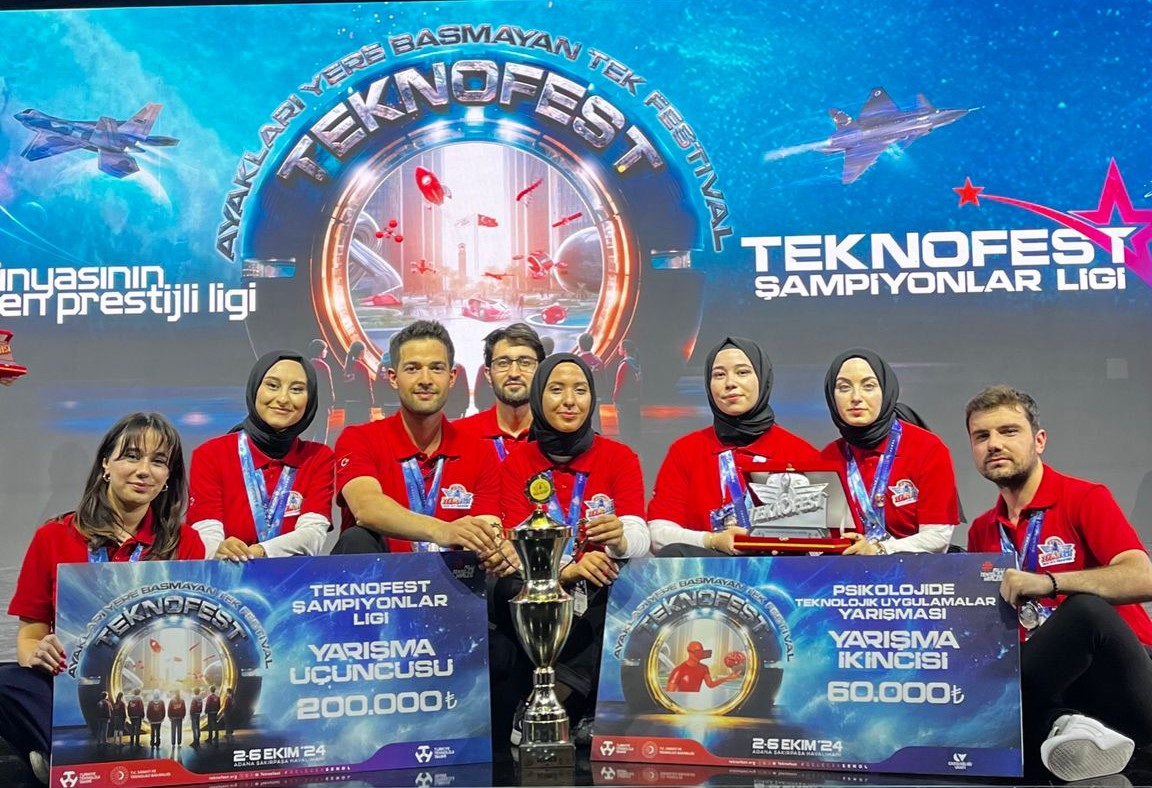

In [23]:
from PIL import Image
raw_image = Image.open("team.jpg")
raw_image

In [39]:
from PIL import ImageDraw, ImageFont

def draw_object_detection_results(image, detections):
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()

    for detection in detections:
        box = [
            detection["box"]["xmin"],
            detection["box"]["ymin"],
            detection["box"]["xmax"],
            detection["box"]["ymax"]
        ]
        label = detection["label"]
        score = detection["score"]

        draw.rectangle(box, outline="green", width=2)

        text = f"{label} ({score:.2f})"
        text_bbox = font.getbbox(text)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]
        text_location = (box[0], box[1] - text_height)
        draw.rectangle(
            [text_location, (text_location[0] + text_width, text_location[1] + text_height)],
            fill="red",
        )
        draw.text(text_location, text, fill="white", font=font)

    return image

In [36]:
pipeline_output = od_pipe(raw_image)

In [40]:
processed_image = draw_object_detection_results(raw_image, pipeline_output)

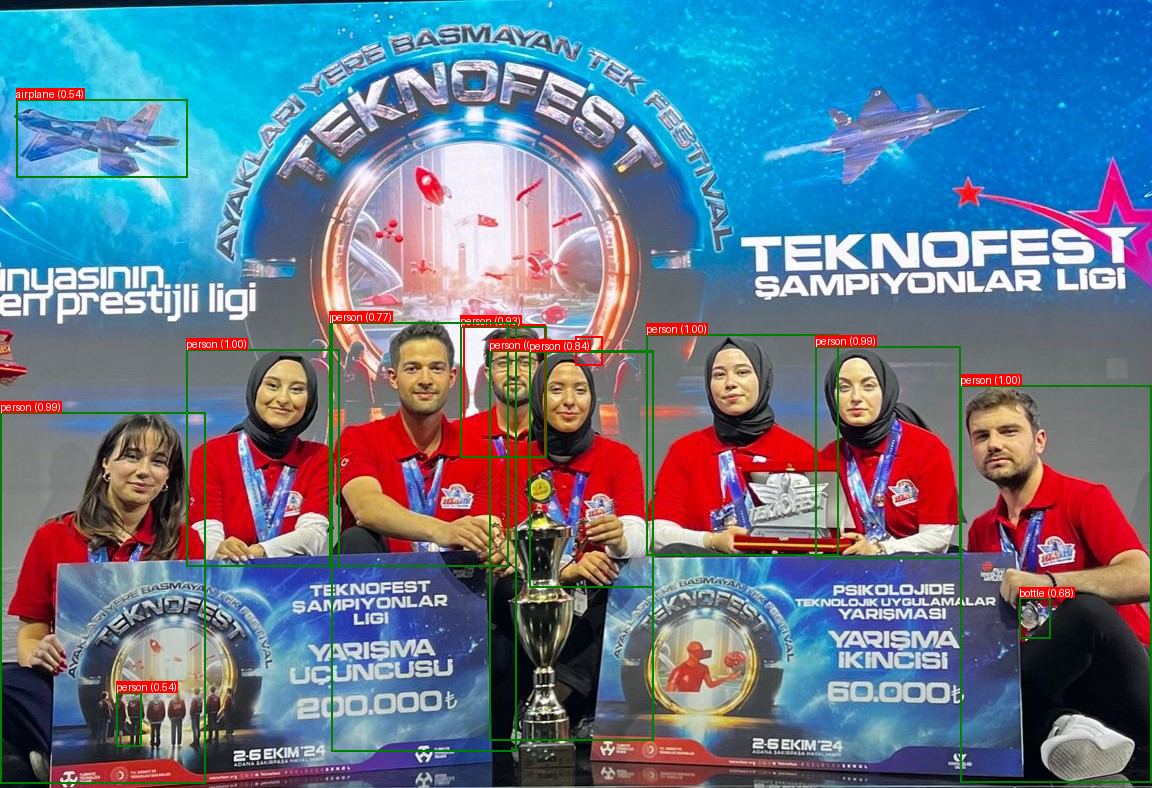

In [41]:
processed_image

In [42]:
import gradio as gr

def get_pipeline_prediction(pil_image):
    pipeline_output = od_pipe(pil_image)
    processed_image = draw_object_detection_results(pil_image, pipeline_output)
    return processed_image

In [43]:
demo = gr.Interface(
    fn = get_pipeline_prediction,
    inputs = gr.Image(label="Input image", 
                    type="pil"),
    outputs = gr.Image(label="Output image with predicted instances",
                    type="pil")
)

In [44]:
demo.launch(share=True)

Running on local URL:  http://127.0.0.1:7860

Could not create share link. Missing file: c:\Users\kaan\anaconda3\envs\huggingface\lib\site-packages\gradio\frpc_windows_amd64_v0.2. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.2/frpc_windows_amd64.exe
2. Rename the downloaded file to: frpc_windows_amd64_v0.2
3. Move the file to this location: c:\Users\kaan\anaconda3\envs\huggingface\lib\site-packages\gradio


In [45]:
demo.close()

Closing server running on port: 7860


In [46]:
od_pipe

In [47]:
pipeline_output

[{'score': 0.9277949333190918,
  'label': 'person',
  'box': {'xmin': 460, 'ymin': 326, 'xmax': 546, 'ymax': 457}},
 {'score': 0.537787139415741,
  'label': 'person',
  'box': {'xmin': 116, 'ymin': 692, 'xmax': 141, 'ymax': 746}},
 {'score': 0.998832643032074,
  'label': 'person',
  'box': {'xmin': 960, 'ymin': 385, 'xmax': 1151, 'ymax': 782}},
 {'score': 0.6780536770820618,
  'label': 'bottle',
  'box': {'xmin': 1019, 'ymin': 597, 'xmax': 1050, 'ymax': 638}},
 {'score': 0.5440106391906738,
  'label': 'airplane',
  'box': {'xmin': 16, 'ymin': 99, 'xmax': 187, 'ymax': 177}},
 {'score': 0.974361002445221,
  'label': 'person',
  'box': {'xmin': 329, 'ymin': 322, 'xmax': 508, 'ymax': 566}},
 {'score': 0.9959766268730164,
  'label': 'person',
  'box': {'xmin': 186, 'ymin': 349, 'xmax': 339, 'ymax': 566}},
 {'score': 0.7689501643180847,
  'label': 'person',
  'box': {'xmin': 331, 'ymin': 322, 'xmax': 516, 'ymax': 751}},
 {'score': 0.9945242404937744,
  'label': 'person',
  'box': {'xmin': 0,

In [55]:
from transformers import pipeline

def summarize_predictions_natural_language_with_llm(detections):
    input_text = "The object detection model detected the following objects:\n"
    for detection in detections:
        label = detection["label"]
        score = detection["score"]
        input_text += f"- {label} with a confidence score of {score:.2f}\n"
    

    summarization_pipeline = pipeline(task="text-generation", model="openai-community/gpt2", max_length=250)

    response = summarization_pipeline(f"Summarize the following information. Give me result like There are four apple and 2 human.:\n{input_text}")
    
    summary = response[0]["generated_text"]

    return summary


In [56]:
image_description = summarize_predictions_natural_language_with_llm(pipeline_output)
image_description

'Summarize the following information. Give me result like There are four apple and 2 human.:\nThe object detection model detected the following objects:\n- person with a confidence score of 0.93\n- person with a confidence score of 0.54\n- person with a confidence score of 1.00\n- bottle with a confidence score of 0.68\n- airplane with a confidence score of 0.54\n- person with a confidence score of 0.97\n- person with a confidence score of 1.00\n- person with a confidence score of 0.77\n- person with a confidence score of 0.99\n- person with a confidence score of 0.93\n- person with a confidence score of 1.00\n- person with a confidence score of 0.84\n- person with a confidence score of 0.99\n- person with a confidence score of 1.00\n- person with a confidence score of 0.64\n- person with a confidence score of 0.66\n- person with a confidence score of 0.71\n- person with a confidence score of 0.73\n- person with a confidence score of 0.77\n- person with a confidence score of 0.95\n'

In [57]:
from transformers import pipeline

tts_pipe = pipeline(task="text-to-speech", model="kakao-enterprise/vits-ljs")

In [58]:
narrated_image_description = tts_pipe(image_description)

In [59]:
from IPython.display import Audio as IPythonAudio

IPythonAudio(narrated_image_description["audio"][0],
            rate=narrated_image_description["sampling_rate"])

In [62]:
import gc

In [63]:
del tts_pipe
del od_pipe

NameError: name 'tts_pipe' is not defined

In [64]:
gc.collect()

13816